# whole dataset

In [67]:
# Display the entire dataset
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the uploaded file into a DataFrame
data = pd.read_excel('tatamotorsprice.xlsx')

# Set display options for better alignment
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Increase the width of the display
pd.set_option('display.max_rows', 3000)     # Show first 3000 rows (be cautious with large datasets)

# Display the first 3000 rows
print(data.head(3000))  # This will show the first 3000 rows

Saving tatamotorsprice.xlsx to tatamotorsprice (12).xlsx
     Tata_Motors_Ltd._historical_data (1)  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5 Unnamed: 6
0                                    Date        Open        High         Low       Close   Adj Close     Volume
1                              2000-01-03        43.5        43.5        43.5        43.5   16.114737          0
2                              2000-01-04        43.5        43.5        43.5        43.5   16.114737          0
3                              2000-01-05        43.5        43.5        43.5        43.5   16.114737          0
4                              2000-01-06        43.5        43.5        43.5        43.5   16.114737          0
5                              2000-01-07        43.5        43.5        43.5        43.5   16.114737          0
6                              2000-01-10        43.5        43.5        43.5        43.5   16.114737          0
7                              2000-01-

# short list first 5 **rows**

In [62]:
# For data manipulation and analysis
import pandas as pd

# For numerical computations
import numpy as np

# For plotting and visualization
import matplotlib.pyplot as plt
from google.colab import files

# Prompt to upload the file
uploaded = files.upload()
# Replace 'stockmarket.csv' with your uploaded file name
df = pd.read_excel('tatamotorsprice.xlsx')
# Display the first few rows of the dataset
print(df.head())
# After uploading, the dataset will appear in the Colab environment

Saving tatamotorsprice.xlsx to tatamotorsprice (9).xlsx
  Tata_Motors_Ltd._historical_data (1) Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6
0                                 Date       Open       High        Low      Close  Adj Close     Volume
1                           2000-01-03       43.5       43.5       43.5       43.5  16.114737          0
2                           2000-01-04       43.5       43.5       43.5       43.5  16.114737          0
3                           2000-01-05       43.5       43.5       43.5       43.5  16.114737          0
4                           2000-01-06       43.5       43.5       43.5       43.5  16.114737          0


# properly allingn the dataset for better understanding

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset and specify the proper header
df = pd.read_excel('tatamotorsprice.xlsx', header=1)  # We use header=1 to take the 2nd row as the header.

# Rename columns for better clarity
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Drop rows where 'Date' is not a valid date
df = df.dropna(subset=['Date'])

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Optionally, drop any rows where 'Close' or other important columns are NaN
df = df.dropna(subset=['Close'])

# Display the first few rows to verify
print(df.head())

Saving tatamotorsprice.xlsx to tatamotorsprice (13).xlsx
        Date  Open  High   Low  Close  Adj Close  Volume
0 2000-01-03  43.5  43.5  43.5   43.5  16.114737       0
1 2000-01-04  43.5  43.5  43.5   43.5  16.114737       0
2 2000-01-05  43.5  43.5  43.5   43.5  16.114737       0
3 2000-01-06  43.5  43.5  43.5   43.5  16.114737       0
4 2000-01-07  43.5  43.5  43.5   43.5  16.114737       0


# plot the dataset by using matplotlib

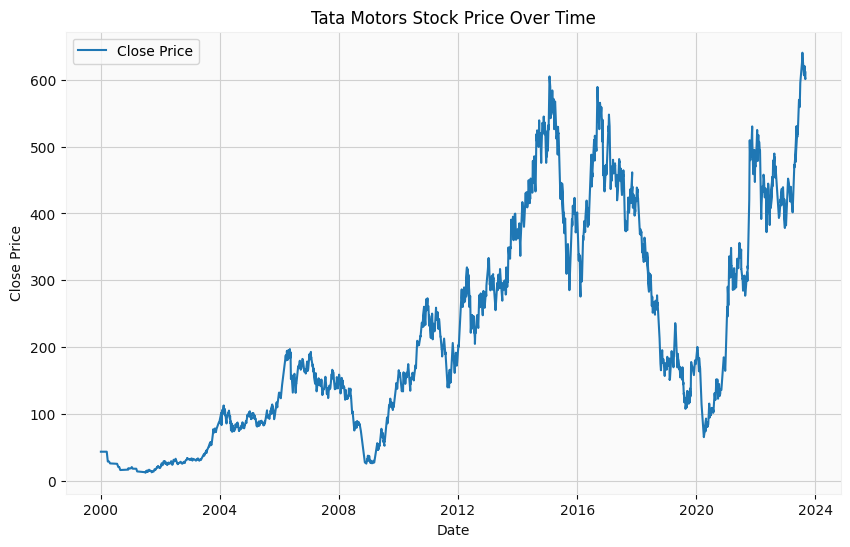

In [69]:
# Plotting the stock prices (e.g., Close Price)
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Tata Motors Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
# Create a 5-day moving average
df['5-day SMA'] = df['Close'].rolling(window=5).mean()

# Create a 10-day moving average
df['10-day SMA'] = df['Close'].rolling(window=10).mean()
# Shortlist the Volume column
volume_df = df[['Date', 'Volume']]


# plot volumes individually

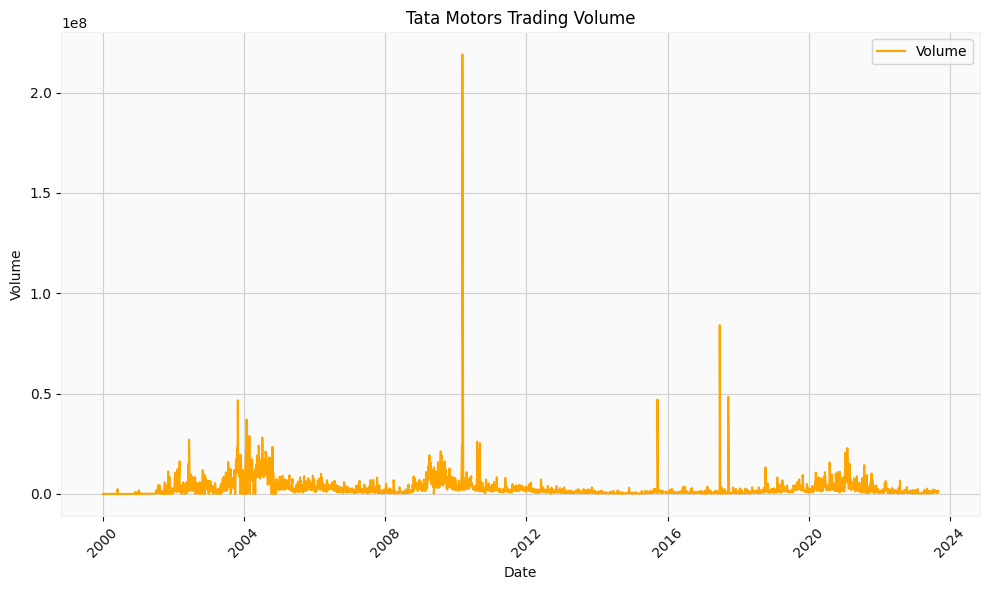

In [51]:
import matplotlib.pyplot as plt

# Plot volume data
plt.figure(figsize=(10, 6))
plt.plot(volume_df['Date'], volume_df['Volume'], label='Volume', color='orange')

# Customize chart
plt.title('Tata Motors Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# i put moving average to this volume

<ipython-input-70-e74f80f0398f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['7-Day MA'] = volume_df['Volume'].rolling(window=7).mean()


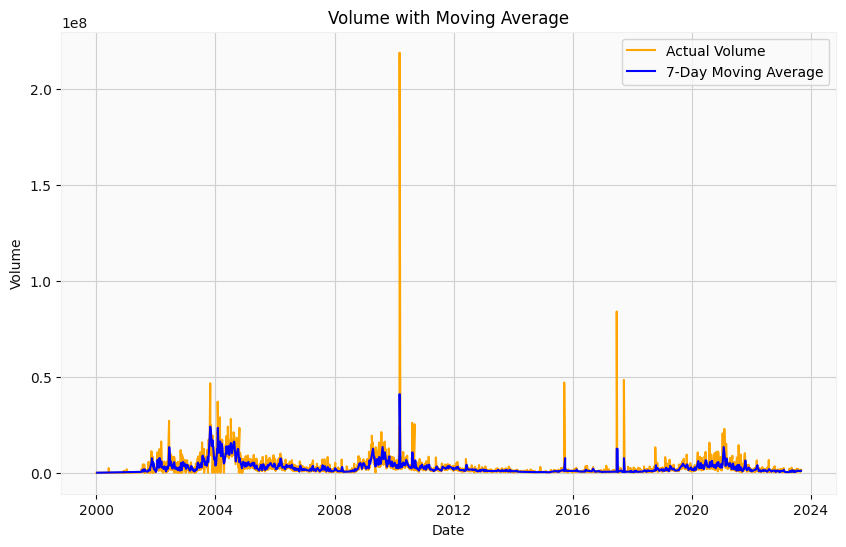

In [70]:
# Calculate a 7-day moving average
volume_df['7-Day MA'] = volume_df['Volume'].rolling(window=7).mean()

# Plot the original volume and moving average
plt.figure(figsize=(10, 6))
plt.plot(volume_df['Date'], volume_df['Volume'], label='Actual Volume', color='orange')
plt.plot(volume_df['Date'], volume_df['7-Day MA'], label='7-Day Moving Average', color='blue')
plt.title('Volume with Moving Average')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# to predict the next day volume by using the historical volume

In [55]:
# Predict the next day volume using the last moving average
next_day_volume = volume_df['7-Day MA'].iloc[-1]
print(f"Predicted Volume for Next Day: {next_day_volume}")

Predicted Volume for Next Day: 1010095.8571428572


In [54]:
# Extract day of the week
volume_df['DayOfWeek'] = volume_df['Date'].dt.day_name()
print(volume_df.groupby('DayOfWeek')['Volume'].mean())

DayOfWeek
Friday       2.630778e+06
Monday       2.263313e+06
Saturday     8.386350e+05
Sunday       1.959921e+06
Thursday     2.581917e+06
Tuesday      2.845374e+06
Wednesday    2.615895e+06
Name: Volume, dtype: float64


<ipython-input-54-580399a919d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['DayOfWeek'] = volume_df['Date'].dt.day_name()


# to apply both volume and price movements simultaniously

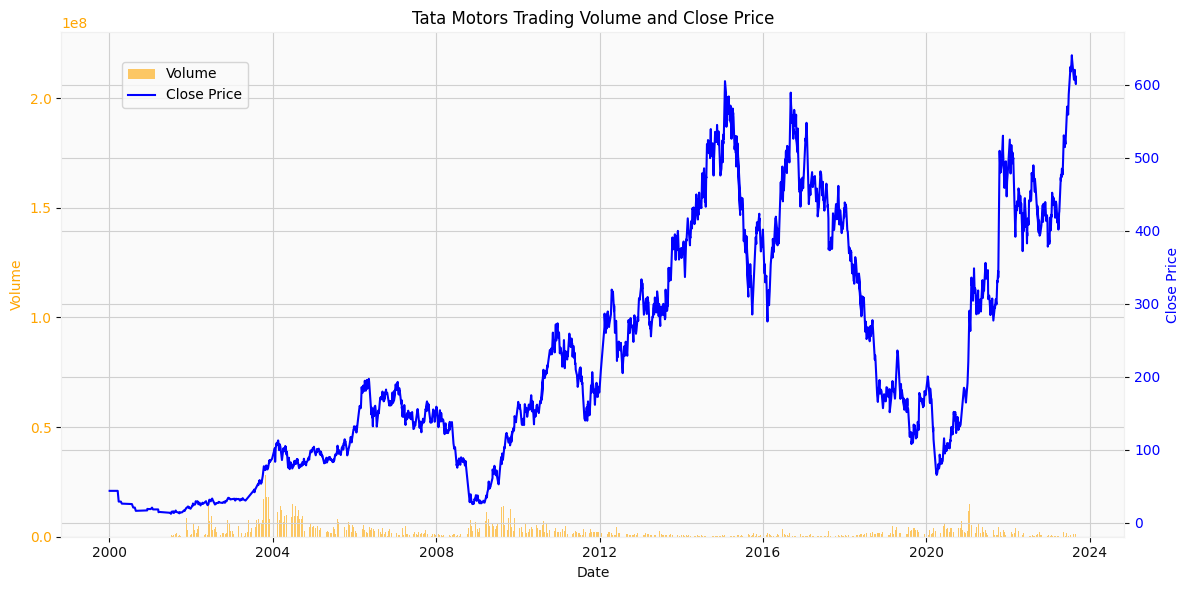

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' contains your dataset with 'Date', 'Close', and 'Volume' columns
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the volume as a bar chart
ax1.bar(df['Date'], df['Volume'], color='orange', alpha=0.6, label='Volume')
ax1.set_ylabel('Volume', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create a second y-axis for the closing price
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax2.set_ylabel('Close Price', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Customize the chart
plt.title('Tata Motors Trading Volume and Close Price')
ax1.set_xlabel('Date')
plt.xticks(rotation=45)
fig.tight_layout()

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

In [72]:
pip install mplfinance

# to plot the realsitic share market candlestick patterns by using ("mplfinance") it is perticularly for stock market chart plotter

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


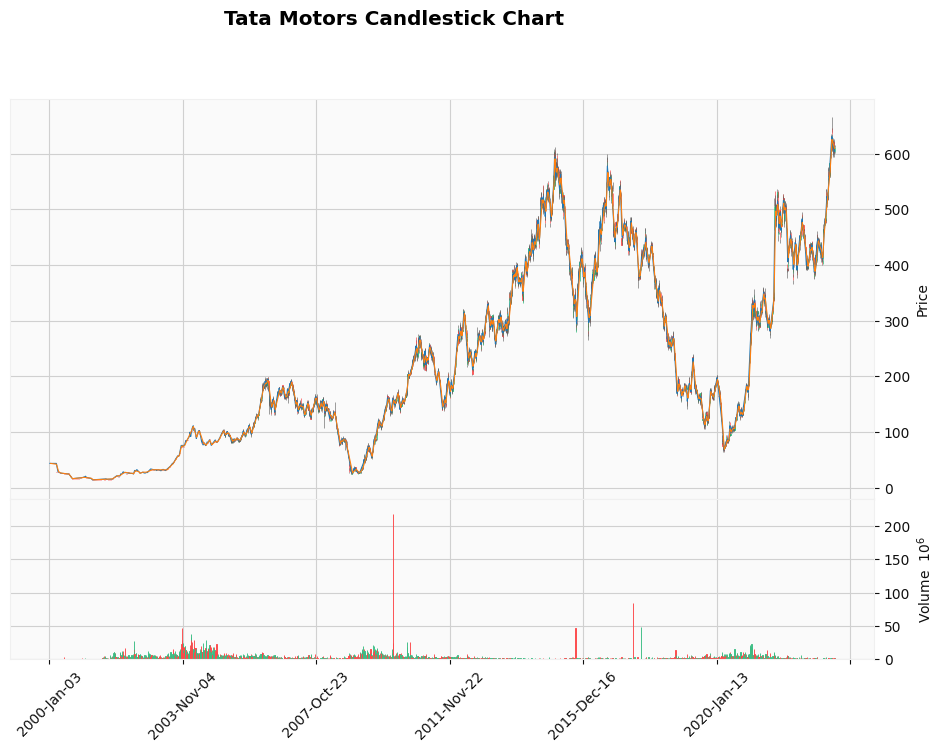

In [73]:
import pandas as pd
import mplfinance as mpf

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index for mplfinance
df.set_index('Date', inplace=True)

# Prepare the data for mplfinance (it requires 'Open', 'High', 'Low', 'Close', and optionally 'Volume')
candlestick_data = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Plot the candlestick chart
mpf.plot(
    candlestick_data,
    type='candle',               # Type of plot: candlestick
    style='yahoo',               # Style (other options: 'classic', 'binance', etc.)
    title='Tata Motors Candlestick Chart',
    ylabel='Price',
    volume=True,                 # Include volume subplot
    mav=(5, 10),                 # Moving averages (5-day and 10-day)
    figsize=(12, 8)
)

# to shortlist the last 8 months candelstick patterns for better understanding

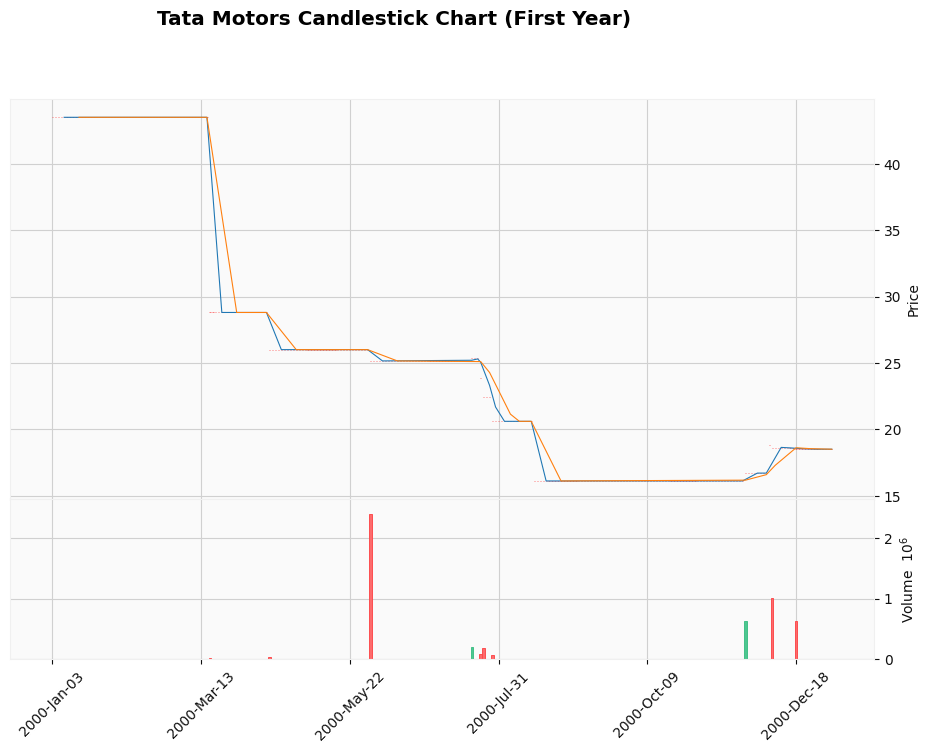

In [90]:
import pandas as pd
import mplfinance as mpf

# Assuming 'Date' is already set as the index and in datetime format
# Filter data for the first year
start_date = df.index.min()  # Earliest date in the dataset
end_date = start_date + pd.DateOffset(years=1)  # One year later

# Select data within the first year
df_first_year = df.loc[start_date:end_date]

# Prepare the data for mplfinance
candlestick_data = df_first_year[['Open', 'High', 'Low', 'Close', 'Volume']]

# Plot the candlestick chart for the first year
mpf.plot(
    candlestick_data,
    type='candle',               # Candlestick chart
    style='yahoo',               # Predefined style
    title='Tata Motors Candlestick Chart (First Year)',
    ylabel='Price',
    volume=True,                 # Include volume subplot
    mav=(5, 10),                 # Moving averages (5-day and 10-day)
    figsize=(12, 8)
)

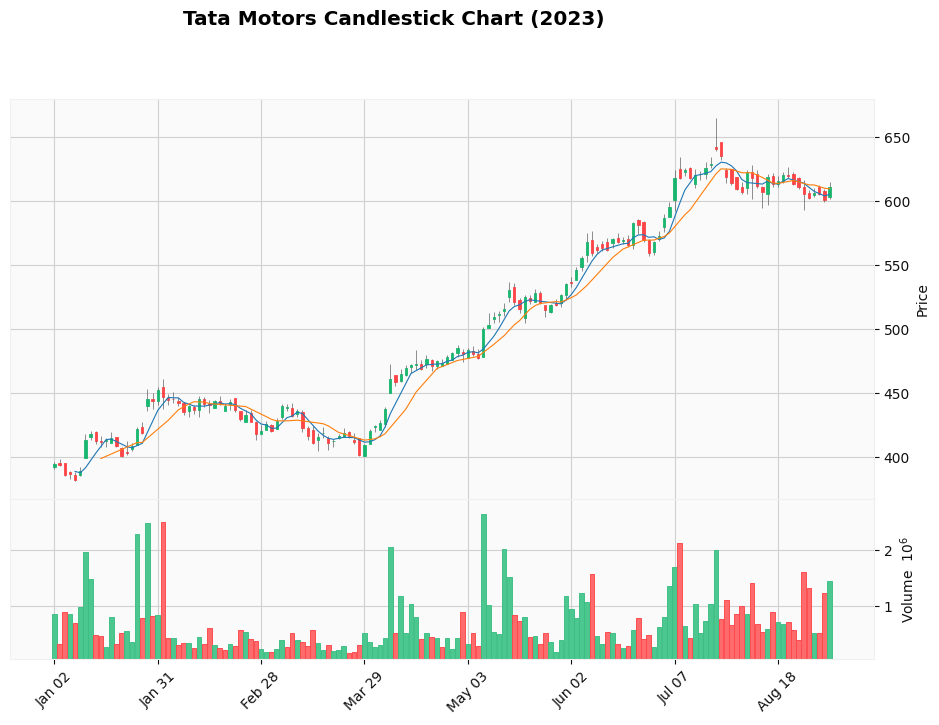

In [100]:
import pandas as pd
import mplfinance as mpf

# Reset the index to bring 'Date' back as a column
df = df.reset_index()

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for a specific year (e.g., 2023)
one_year_data = df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-12-31')]

# Set 'Date' as the index for mplfinance
one_year_data.set_index('Date', inplace=True)

# Prepare the data for mplfinance (it requires 'Open', 'High', 'Low', 'Close', and optionally 'Volume')
candlestick_data = one_year_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Plot the candlestick chart
mpf.plot(
    candlestick_data,
    type='candle',               # Type of plot: candlestick
    style='yahoo',               # Style (other options: 'classic', 'binance', etc.)
    title='Tata Motors Candlestick Chart (2023)',
    ylabel='Price',
    volume=True,                 # Include volume subplot
    mav=(5, 10),                 # Moving averages (5-day and 10-day)
    figsize=(12, 8)
)

# it is the final prediction of next price movement by using some technical analysis

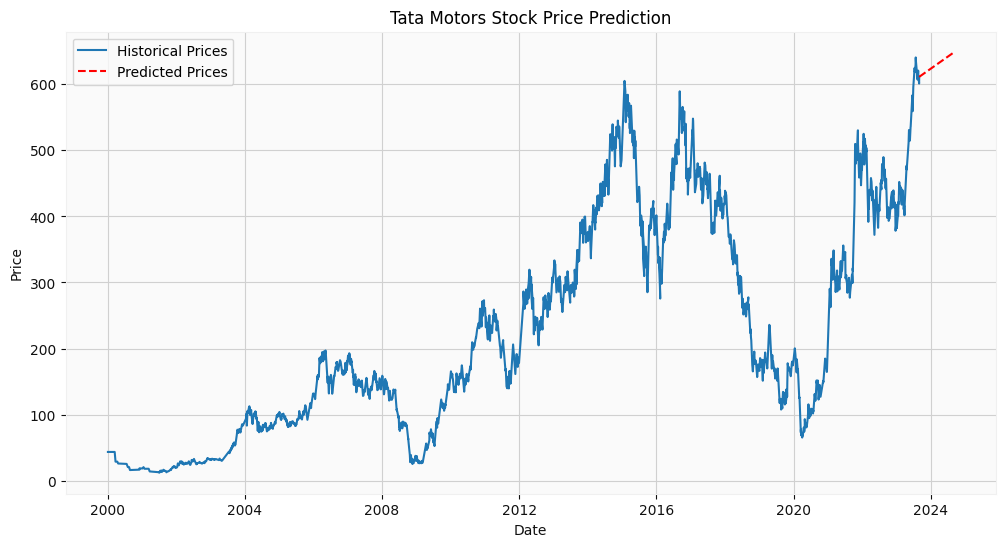

In [102]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Filter the 'Close' prices
close_prices = df['Close']

# Apply Exponential Smoothing
model = ExponentialSmoothing(close_prices, trend='add', seasonal=None)
fit_model = model.fit()

# Predict for the next 365 days (1 year)
forecast = fit_model.forecast(steps=365)

# Plot the original data and the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Historical Prices')
plt.plot(pd.date_range(df['Date'].iloc[-1], periods=365, freq='D'), forecast, label='Predicted Prices', linestyle='--', color='red')
plt.title('Tata Motors Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# conclusion

the conclusion of my project is to predict the stocks future price for trustable investment for investors to invest with hope and better returns in long terms